In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import time_series_augmentation.utils.augmentation as aug
import time_series_augmentation.utils.helper as hlp
from utils.logging import saving_result
from utils.read import read_UCRArchive, reshape_new_to_old_format, reshape_old_to_new_format

In [2]:
file_path = '../Data/UCRArchive_2018'
x_train, y_train, x_test, y_test = read_UCRArchive(file_path, 'Adiac')

In [3]:
augmentation_funcs = [aug.jitter, aug.scaling, aug.rotation, aug.permutation, aug.magnitude_warp ]

def augmentation_loop(augmentation_list, x_train, x_test):
    x_train_aug = list()
    x_test_aug = list()
    for method in augmentation_list:
        x_train_aug.append(method(x_train))
        x_test_aug.append(method(x_test))
    return x_train_aug, x_test_aug

In [4]:
x_train_aug, x_test_aug = augmentation_loop(augmentation_funcs, x_train, x_test)

/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Baseline

In [7]:
from sktime.datasets import load_UCR_UEA_dataset
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import accuracy_score

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [229]:
# Used to (num of sample, sample length, dim)
arr1 = np.array(
    [
        [
            [1,2,3],
        ], 
        [
            [7,8,9],
        ]
    ])
arr1 = arr1.reshape(2, 3, 1)
print(arr1.shape)
print(arr1)

# New (num of sample, dim, sample length)
arr1 = np.array(
    [
        [
            [1,2,3],
        ], 
        [
            [7,8,9],
        ]
    ])
print(arr1.shape)
print(arr1)


(2, 3, 1)
[[[1]
  [2]
  [3]]

 [[7]
  [8]
  [9]]]
(2, 1, 3)
[[[1 2 3]]

 [[7 8 9]]]


In [231]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
shape = x_train.shape
x_train = x_train.reshape((shape[0], shape[1], 1))

print(x_train.shape)

(390, 176)


In [169]:
UCR_DATASET_KEY = ['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'Car', 'CBF', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee']

---------------
## Experiment

In [5]:
from sktime.datasets import load_UCR_UEA_dataset
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Baseline

In [7]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_test, y_test= load_UCR_UEA_dataset('Adiac', split="test", return_X_y=True, return_type='numpy2D')

x_train = reshape_new_to_old_format(x_train)
x_train = reshape_old_to_new_format(x_train)

x_test = reshape_new_to_old_format(x_test)
x_test = reshape_old_to_new_format(x_test)

rocket = RocketClassifier()
rocket.fit(x_train, y_train)
y_pred = rocket.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Adiac', '==>', acc)

Adiac ==> 0.7749360613810742


In [9]:
pricision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
saving_result(
    {'accuracy_score': acc}, 
    {'model_name': 'Rocket'},
    {'dataset_name': dataset_name, "datapoint_shape": dataset.shape, "number_of_class":len(set(list(y_pred)))},
    {'augmentation_name', augmentation, **aug_params},
    )

### Augmentation

#### Jitter

In [ ]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_train = reshape_new_to_old_format(x_train)

plt.plot(x_train[0])
plt.plot(aug.jitter(x_train, sigma=0.5)[0])

In [20]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_test, y_test= load_UCR_UEA_dataset('Adiac', split="test", return_X_y=True, return_type='numpy2D')

for i in range(2, 22, 2):
    sigma = (i/100)
    x_train = reshape_new_to_old_format(x_train)
    x_train_jitter = aug.jitter(x_train, sigma=sigma)
    x_train_jitter = reshape_old_to_new_format(x_train_jitter)

    x_test = reshape_new_to_old_format(x_test)
    x_test_jitter = aug.jitter(x_test, sigma=sigma)
    x_test_jitter = reshape_old_to_new_format(x_test_jitter)

    rocket = RocketClassifier()
    rocket.fit(x_train_jitter, y_train)
    y_pred = rocket.predict(x_test_jitter)
    acc = accuracy_score(y_test, y_pred)
    print(f'Adiac JITTER(sigma={sigma})', '==>', acc)

Adiac JITTER(sigma=0.02) ==> 0.7033248081841432
Adiac JITTER(sigma=0.04) ==> 0.5856777493606138
Adiac JITTER(sigma=0.06) ==> 0.5447570332480819
Adiac JITTER(sigma=0.08) ==> 0.45012787723785164
Adiac JITTER(sigma=0.1) ==> 0.3452685421994885
Adiac JITTER(sigma=0.12) ==> 0.3171355498721228
Adiac JITTER(sigma=0.14) ==> 0.29923273657289
Adiac JITTER(sigma=0.16) ==> 0.3145780051150895
Adiac JITTER(sigma=0.18) ==> 0.2813299232736573
Adiac JITTER(sigma=0.2) ==> 0.23017902813299232


#### Scaling

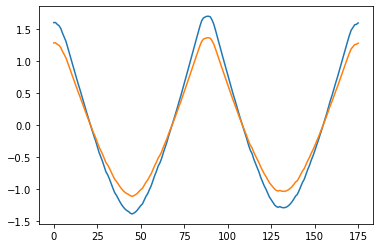

In [32]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_train = reshape_new_to_old_format(x_train)

plt.plot(x_train[0])
plt.plot(aug.scaling(x_train, sigma=1)[0])

In [38]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_test, y_test= load_UCR_UEA_dataset('Adiac', split="test", return_X_y=True, return_type='numpy2D')

for i in range(1, 20, 1):
    sigma = (i/10)
    x_train = reshape_new_to_old_format(x_train)
    x_train_jitter = aug.scaling(x_train, sigma=sigma)
    x_train_jitter = reshape_old_to_new_format(x_train_jitter)

    x_test = reshape_new_to_old_format(x_test)
    x_test_jitter = aug.scaling(x_test, sigma=sigma)
    x_test_jitter = reshape_old_to_new_format(x_test_jitter)

    rocket = RocketClassifier()
    rocket.fit(x_train_jitter, y_train)
    y_pred = rocket.predict(x_test_jitter)
    acc = accuracy_score(y_test, y_pred)
    print(f'Adiac Scaling(sigma={sigma})', '==>', acc)

Adiac Scaling(sigma=0.1) ==> 0.7774936061381074
Adiac Scaling(sigma=0.2) ==> 0.7877237851662404
Adiac Scaling(sigma=0.3) ==> 0.7877237851662404
Adiac Scaling(sigma=0.4) ==> 0.7877237851662404
Adiac Scaling(sigma=0.5) ==> 0.7877237851662404
Adiac Scaling(sigma=0.6) ==> 0.7391304347826086
Adiac Scaling(sigma=0.7) ==> 0.7595907928388747
Adiac Scaling(sigma=0.8) ==> 0.7391304347826086
Adiac Scaling(sigma=0.9) ==> 0.7237851662404092
Adiac Scaling(sigma=1.0) ==> 0.7416879795396419
Adiac Scaling(sigma=1.1) ==> 0.6982097186700768
Adiac Scaling(sigma=1.2) ==> 0.7468030690537084
Adiac Scaling(sigma=1.3) ==> 0.7263427109974424
Adiac Scaling(sigma=1.4) ==> 0.7263427109974424
Adiac Scaling(sigma=1.5) ==> 0.7391304347826086
Adiac Scaling(sigma=1.6) ==> 0.7033248081841432
Adiac Scaling(sigma=1.7) ==> 0.6777493606138107
Adiac Scaling(sigma=1.8) ==> 0.7007672634271099
Adiac Scaling(sigma=1.9) ==> 0.7263427109974424


#### Permutation

/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


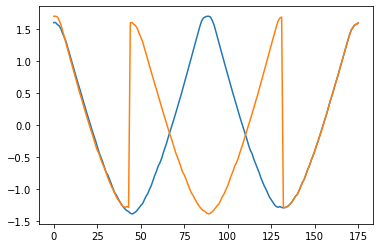

In [40]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_train = reshape_new_to_old_format(x_train)

plt.plot(x_train[0])
plt.plot(aug.permutation(x_train,)[0])

In [43]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_test, y_test= load_UCR_UEA_dataset('Adiac', split="test", return_X_y=True, return_type='numpy2D')

for i in range(2, 20, 1):
    segment = i
    x_train = reshape_new_to_old_format(x_train)
    x_train_jitter = aug.permutation(x_train, max_segments=segment)
    x_train_jitter = reshape_old_to_new_format(x_train_jitter)

    x_test = reshape_new_to_old_format(x_test)
    x_test_jitter = aug.permutation(x_test, max_segments=segment)
    x_test_jitter = reshape_old_to_new_format(x_test_jitter)

    rocket = RocketClassifier()
    rocket.fit(x_train_jitter, y_train)
    y_pred = rocket.predict(x_test_jitter)
    acc = accuracy_score(y_test, y_pred)
    print(f'Adiac permutation(segment={segment})', '==>', acc)

Adiac permutation(segment=2) ==> 0.7851662404092071
Adiac permutation(segment=3) ==> 0.7570332480818415


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=4) ==> 0.7033248081841432


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=5) ==> 0.6521739130434783


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=6) ==> 0.5601023017902813


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=7) ==> 0.4117647058823529


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=8) ==> 0.4219948849104859


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=9) ==> 0.4219948849104859


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=10) ==> 0.3171355498721228


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=11) ==> 0.2659846547314578


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=12) ==> 0.2659846547314578


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=13) ==> 0.2506393861892583


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=14) ==> 0.27365728900255754


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=15) ==> 0.21227621483375958


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=16) ==> 0.20971867007672634


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=17) ==> 0.24552429667519182


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=18) ==> 0.17391304347826086


/Users/Pongpanod.Sa/Desktop/cu/thesis/coding/pun_master_thesis/time_series_augmentation/utils/augmentation.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  warp = np.concatenate(np.random.permutation(splits)).ravel()
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Adiac permutation(segment=19) ==> 0.19948849104859334


#### Magnitude Warping

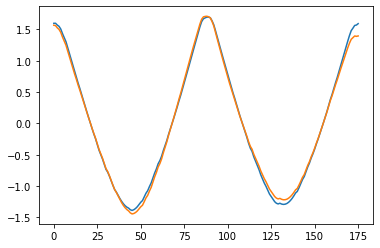

In [44]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_train = reshape_new_to_old_format(x_train)

plt.plot(x_train[0])
plt.plot(aug.magnitude_warp(x_train,)[0])

In [53]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_test, y_test= load_UCR_UEA_dataset('Adiac', split="test", return_X_y=True, return_type='numpy2D')

for sigma in range(1, 11, 1):
    sigma=sigma/10
    for knot in range(1, 6, 1):
        x_train = reshape_new_to_old_format(x_train)
        x_train_jitter = aug.magnitude_warp(x_train, sigma=sigma, knot=knot)
        x_train_jitter = reshape_old_to_new_format(x_train_jitter)

        x_test = reshape_new_to_old_format(x_test)
        x_test_jitter = aug.magnitude_warp(x_test, sigma=sigma, knot=knot)
        x_test_jitter = reshape_old_to_new_format(x_test_jitter)

        rocket = RocketClassifier()
        rocket.fit(x_train_jitter, y_train)
        y_pred = rocket.predict(x_test_jitter)
        acc = accuracy_score(y_test, y_pred)
        print(f'Adiac magnitude_warp(sigma={sigma}, knot={knot})', '==>', acc)


Adiac magnitude_warp(sigma=0.1, knot=1) ==> 0.7263427109974424
Adiac magnitude_warp(sigma=0.1, knot=2) ==> 0.6547314578005116
Adiac magnitude_warp(sigma=0.1, knot=3) ==> 0.6086956521739131
Adiac magnitude_warp(sigma=0.1, knot=4) ==> 0.6214833759590793
Adiac magnitude_warp(sigma=0.1, knot=5) ==> 0.5728900255754475
Adiac magnitude_warp(sigma=0.2, knot=1) ==> 0.6035805626598465
Adiac magnitude_warp(sigma=0.2, knot=2) ==> 0.5396419437340153
Adiac magnitude_warp(sigma=0.2, knot=3) ==> 0.4936061381074169
Adiac magnitude_warp(sigma=0.2, knot=4) ==> 0.4578005115089514
Adiac magnitude_warp(sigma=0.2, knot=5) ==> 0.4117647058823529
Adiac magnitude_warp(sigma=0.3, knot=1) ==> 0.5856777493606138
Adiac magnitude_warp(sigma=0.3, knot=2) ==> 0.4961636828644501
Adiac magnitude_warp(sigma=0.3, knot=3) ==> 0.3631713554987212
Adiac magnitude_warp(sigma=0.3, knot=4) ==> 0.38107416879795397
Adiac magnitude_warp(sigma=0.3, knot=5) ==> 0.32225063938618925
Adiac magnitude_warp(sigma=0.4, knot=1) ==> 0.5268542

In [54]:
x_train, y_train = load_UCR_UEA_dataset('Adiac', split="train", return_X_y=True, return_type='numpy2D')
x_test, y_test= load_UCR_UEA_dataset('Adiac', split="test", return_X_y=True, return_type='numpy2D')

for sigma in range(1, 11, 1):
    sigma=sigma/10
    for knot in range(6, 11, 1):
        x_train = reshape_new_to_old_format(x_train)
        x_train_jitter = aug.magnitude_warp(x_train, sigma=sigma, knot=knot)
        x_train_jitter = reshape_old_to_new_format(x_train_jitter)

        x_test = reshape_new_to_old_format(x_test)
        x_test_jitter = aug.magnitude_warp(x_test, sigma=sigma, knot=knot)
        x_test_jitter = reshape_old_to_new_format(x_test_jitter)

        rocket = RocketClassifier()
        rocket.fit(x_train_jitter, y_train)
        y_pred = rocket.predict(x_test_jitter)
        acc = accuracy_score(y_test, y_pred)
        print(f'Adiac magnitude_warp(sigma={sigma}, knot={knot})', '==>', acc)

Adiac magnitude_warp(sigma=0.1, knot=6) ==> 0.5473145780051151
Adiac magnitude_warp(sigma=0.1, knot=7) ==> 0.5370843989769821
Adiac magnitude_warp(sigma=0.1, knot=8) ==> 0.5294117647058824
Adiac magnitude_warp(sigma=0.1, knot=9) ==> 0.46035805626598464
Adiac magnitude_warp(sigma=0.1, knot=10) ==> 0.48081841432225064
Adiac magnitude_warp(sigma=0.2, knot=6) ==> 0.4219948849104859
Adiac magnitude_warp(sigma=0.2, knot=7) ==> 0.36061381074168797
Adiac magnitude_warp(sigma=0.2, knot=8) ==> 0.36061381074168797
Adiac magnitude_warp(sigma=0.2, knot=9) ==> 0.34782608695652173
Adiac magnitude_warp(sigma=0.2, knot=10) ==> 0.3350383631713555
Adiac magnitude_warp(sigma=0.3, knot=6) ==> 0.31202046035805625
Adiac magnitude_warp(sigma=0.3, knot=7) ==> 0.3145780051150895
Adiac magnitude_warp(sigma=0.3, knot=8) ==> 0.2813299232736573
Adiac magnitude_warp(sigma=0.3, knot=9) ==> 0.21739130434782608
Adiac magnitude_warp(sigma=0.3, knot=10) ==> 0.22250639386189258
Adiac magnitude_warp(sigma=0.4, knot=6) ==> 